## TASK 3
### Laptop with Browser Icon

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.


DOWNLOAD DATASET FROM HERE: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## General data analysis

In [3]:
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Analysis of variables and the relationship between them

In [8]:
data['Car_Name'].nunique()

98

In [9]:
data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

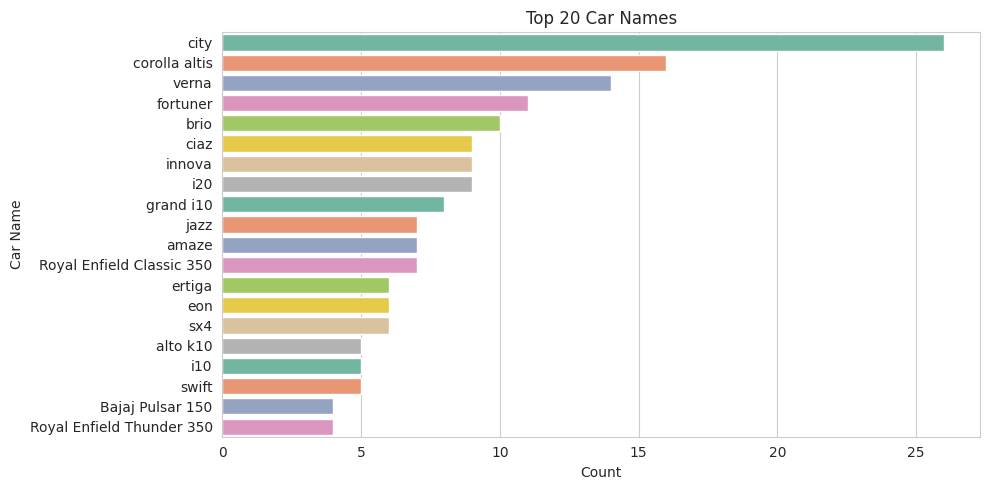

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=data['Car_Name'].value_counts()[:20].values, y=data['Car_Name'].value_counts()[:20].index, palette=sns.color_palette("Set2"))
plt.title('Top 20 Car Names')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.tight_layout()
plt.show()

In [11]:
cars_price_byname = data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

In [12]:
cars_price_byname.head(10)

Car_Name
land cruiser     35.000000
fortuner         18.685455
innova           12.777778
creta            11.800000
elantra          11.600000
vitara brezza     9.250000
ciaz              7.472222
city              7.419231
corolla altis     7.183125
ertiga            6.775000
Name: Selling_Price, dtype: float64

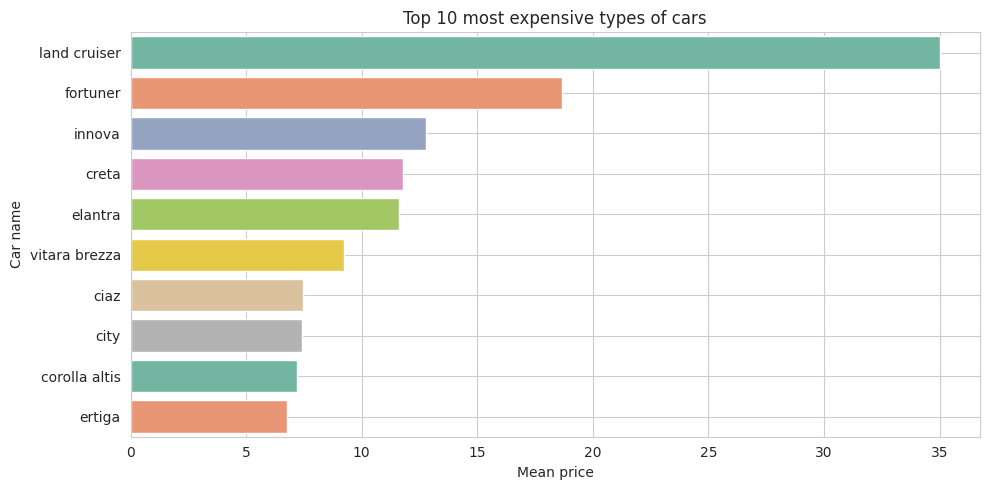

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=cars_price_byname[:10].values, y=cars_price_byname[:10].index, palette=sns.color_palette("Set2"))
plt.title('Top 10 most expensive types of cars')
plt.xlabel('Mean price')
plt.ylabel('Car name')
plt.tight_layout()
plt.grid(True)
plt.show()

The data clearly shows that the type of car influences its price. Larger SUVs like the Land Cruiser tend to have higher prices compared to smaller models like the Ertiga. Hence, the type of car is a key factor in determining its market value.

In [14]:
data['Year'].describe()

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

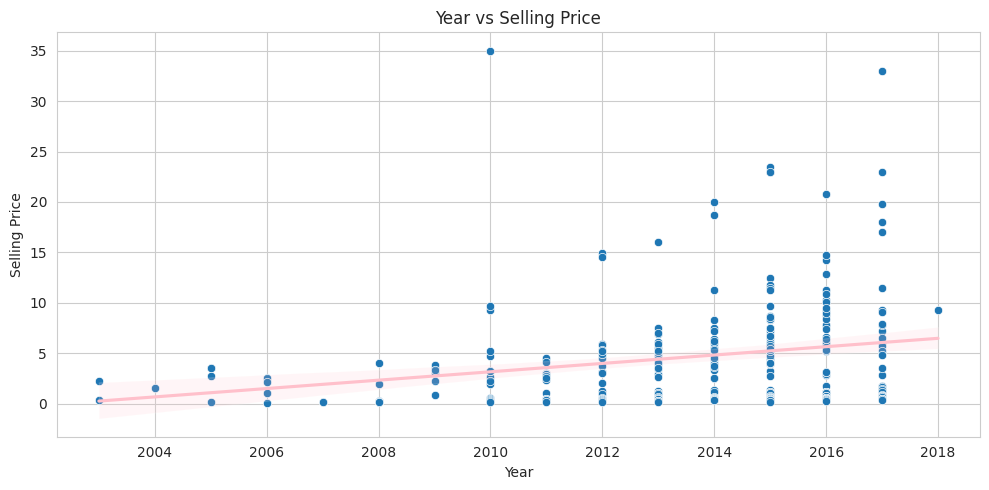

In [15]:
ax, fig = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Year', y='Selling_Price', data=data)
sns.regplot(x='Year', y='Selling_Price', data=data, scatter=False, color='pink')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

The addition of the regression line to the scatter plot reveals a positive correlation between the year of production and the selling price of the cars. This suggests that over time, there is generally an increase in the selling price of the cars in the dataset. Therefore, it can be inferred that newer models tend to command higher prices compared to older ones.

In [16]:
data.Present_Price.describe()

count    301.000000
mean       7.628472
std        8.642584
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

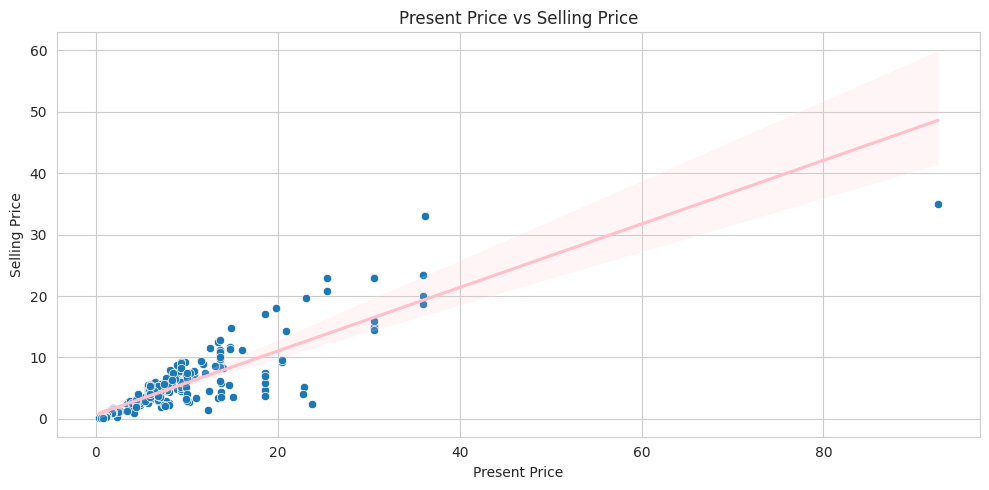

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
sns.regplot(x='Present_Price', y='Selling_Price', data=data, scatter=False, color='pink')
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

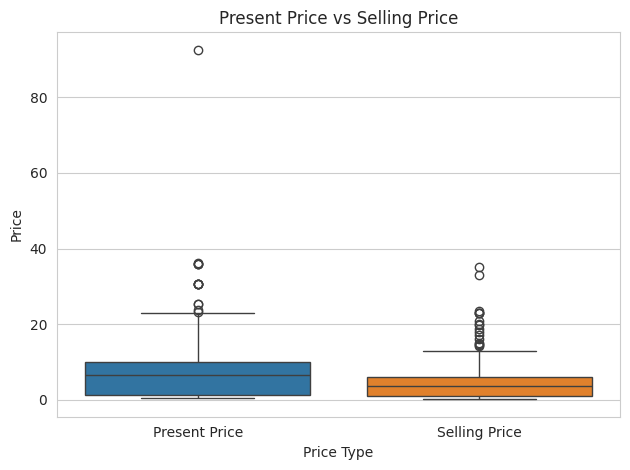

In [18]:
sns.boxplot(data=data[['Present_Price', 'Selling_Price']])
plt.title('Present Price vs Selling Price')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1], labels=['Present Price', 'Selling Price'])
plt.tight_layout()
plt.show()

The regplot reveals a positive correlation between the present price and the selling price of the cars. Generally, as the present price increases, the selling price tends to increase as well. However, it's noticeable from the graph that the selling prices are lower compared to their present prices, indicating that cars are sold at a lower price than their current value.

In [19]:
data.Driven_kms.describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Driven_kms, dtype: float64

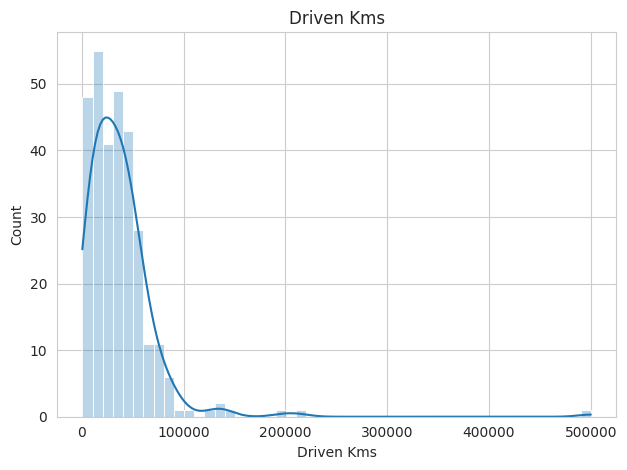

In [20]:
sns.histplot(data['Driven_kms'], kde=True, alpha=0.3)
plt.title('Driven Kms')
plt.xlabel('Driven Kms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

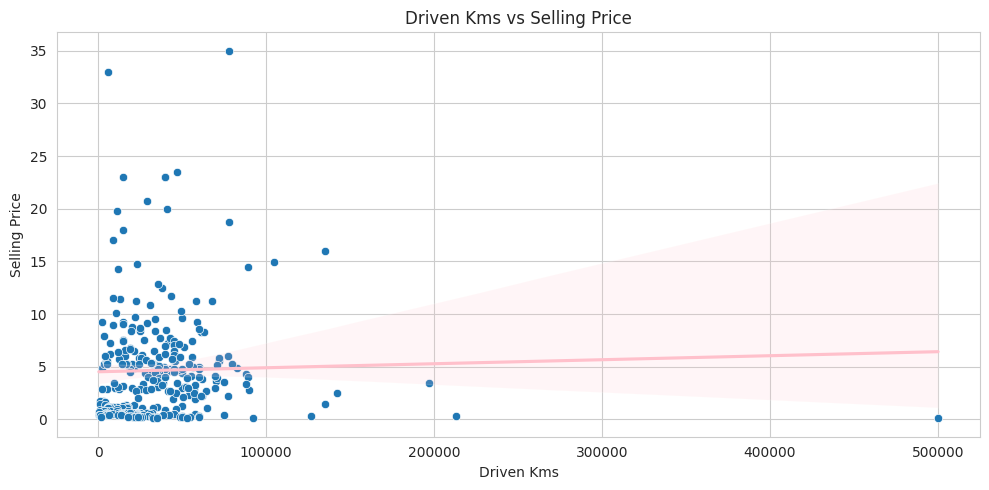

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=data)
sns.regplot(x='Driven_kms', y='Selling_Price', data=data, scatter=False, color='pink')
plt.title('Driven Kms vs Selling Price')
plt.xlabel('Driven Kms')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

The scatter plot along with the regression line indicates that there is not a strong correlation between the number of kilometers driven and the selling price of the cars. The nearly straight regression line suggests that the number of kilometers driven does not have a significant impact on the selling price. Therefore, it can be inferred that buyers may not heavily consider the mileage when determining the value of the cars.

In [22]:
data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [23]:
data.groupby('Fuel_Type')['Selling_Price'].mean()

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64

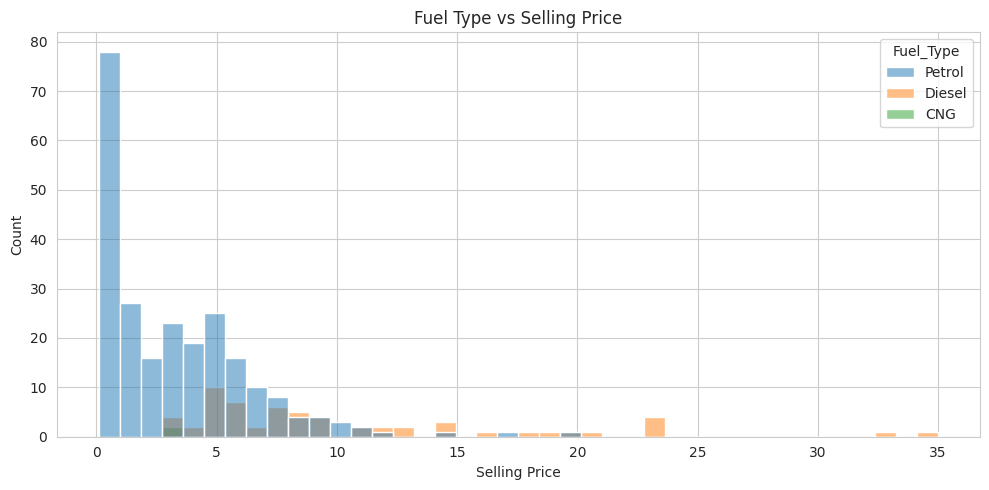

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(x='Selling_Price', data=data, hue='Fuel_Type', bins=40)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The histogram indicates that the most expensive cars in the dataset were of the "Diesel" fuel type.

In [25]:
data.Selling_type.value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [27]:
data.groupby('Selling_type')['Selling_Price'].mean()

Selling_type
Dealer        6.721692
Individual    0.870943
Name: Selling_Price, dtype: float64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

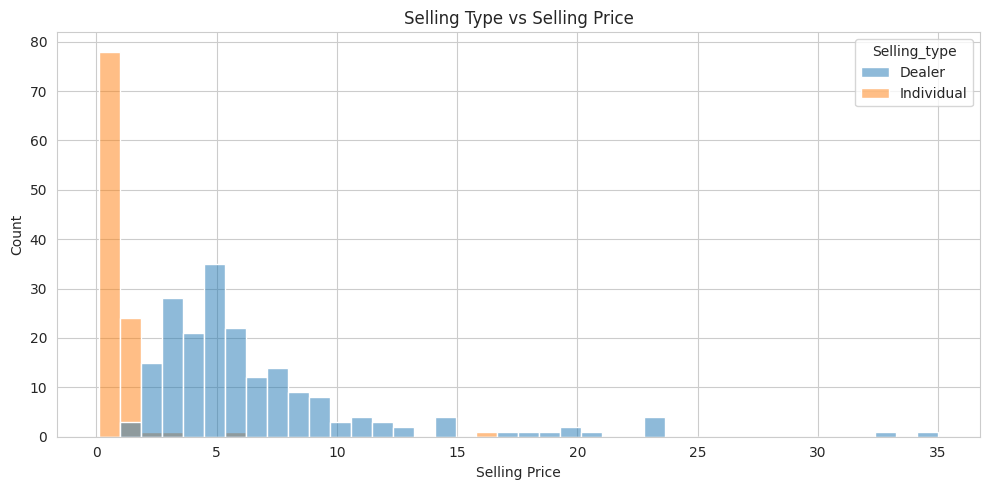

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(x='Selling_Price', data=data, hue='Selling_type', bins=40)
plt.title('Selling Type vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.tight_layout()
plt

The data analysis reveals a significant difference in selling prices between dealers and individual sellers. Dealer selling prices, with an average of 6.72 units, are substantially higher compared to individual sellers, whose average selling price is only 0.87 units. This trend is further illustrated in the histogram, where the distribution of dealer selling prices is notably shifted towards higher values compared to individual sellers.

In [29]:
data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [30]:
data.groupby('Transmission')['Selling_Price'].mean()

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64

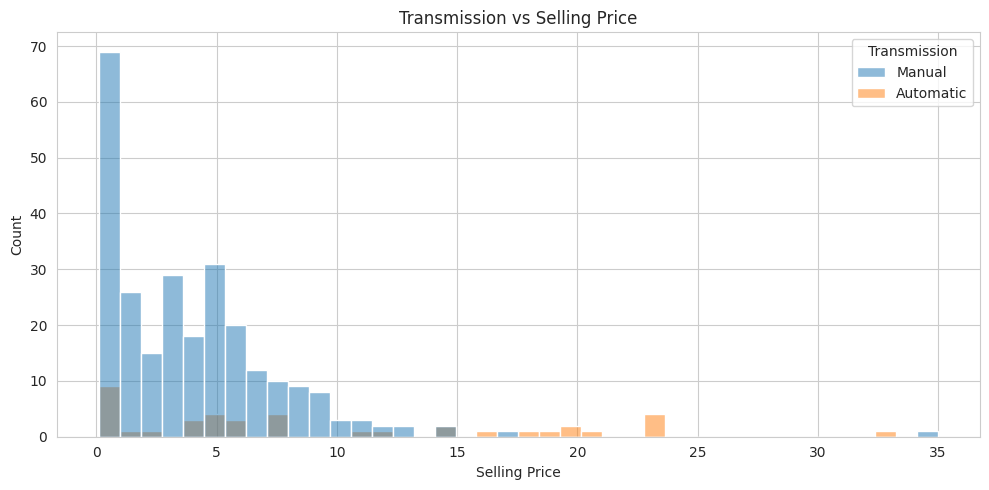

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(x='Selling_Price', data=data, hue='Transmission', bins=40)
plt.title('Transmission vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.tight_layout()

The data indicates that cars with automatic transmission have a significantly higher average selling price of 9.42 units compared to cars with manual transmission, which have an average selling price of 3.93 units.

In [33]:
data.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [36]:
data.groupby('Owner')['Selling_Price'].mean()

Owner
0    4.761552
1    1.970000
3    2.500000
Name: Selling_Price, dtype: float64

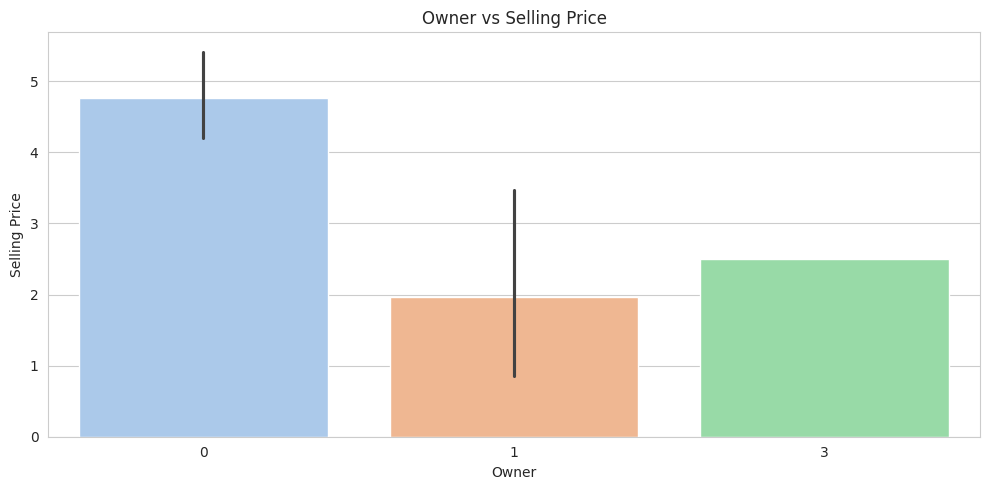

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='Owner', y='Selling_Price', data=data, palette=sns.color_palette('pastel'))
plt.title('Owner vs Selling Price')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

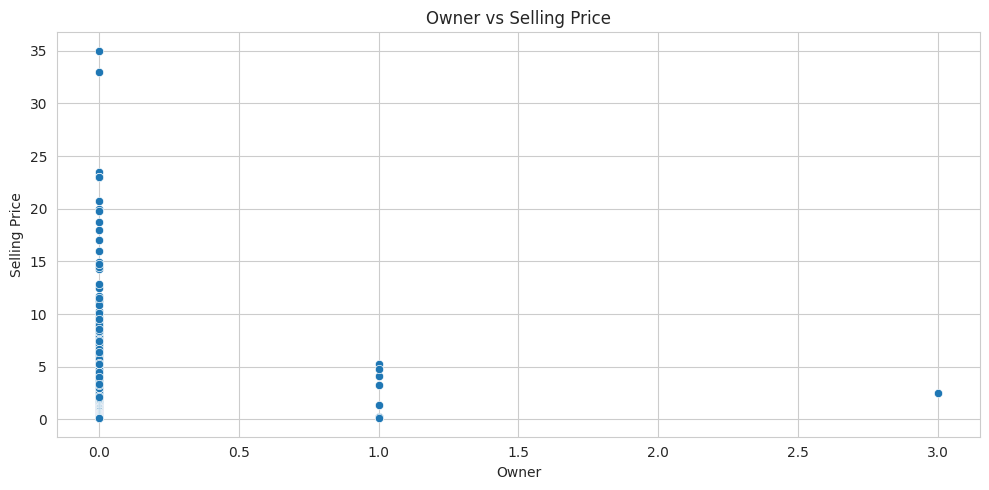

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Owner', y='Selling_Price', data=data)
plt.title('Owner vs Selling Price')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

The data indicates that cars with no previous owners tend to have higher selling prices compared to those with one or three previous owners.

## Preparing data for model training

In [42]:
top_names = data['Car_Name'].value_counts().sort_values(ascending=False).head(10).index.tolist()
top_names

['city',
 'corolla altis',
 'verna',
 'fortuner',
 'brio',
 'ciaz',
 'innova',
 'i20',
 'grand i10',
 'Royal Enfield Classic 350']

In [44]:
data['Car_Name'] = data['Car_Name'].apply(lambda x: x if x in top_names else 'Other')
data['Car_Name'].value_counts()

Car_Name
Other                        182
city                          26
corolla altis                 16
verna                         14
fortuner                      11
brio                          10
ciaz                           9
innova                         9
i20                            9
grand i10                      8
Royal Enfield Classic 350      7
Name: count, dtype: int64

In [45]:
data = pd.get_dummies(data, columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Other,Car_Name_Royal Enfield Classic 350,Car_Name_brio,Car_Name_ciaz,Car_Name_city,...,Car_Name_i20,Car_Name_innova,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [46]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 22), (61, 22), (240,), (61,))

## Model training

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

In [51]:
scores = []

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  scores.append({'Name': name, 'Model': model, 'MSE': mse, 'R2': r2})
  print(f'{name} MSE: {mse:.2f}, R2: {r2:.2f}')

Linear Regression MSE: 2.69, R2: 0.88
Random Forest MSE: 0.86, R2: 0.96
Decision Tree MSE: 1.30, R2: 0.94


In [52]:
data_scores = pd.DataFrame(scores)
data_scores

,Name,Model,MSE,R2
0,Linear Regression,LinearRegression(),2.686442,0.883379
1,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.859665,0.962681
2,Decision Tree,DecisionTreeRegressor(),1.295859,0.943745


In [53]:
best_model = data_scores.loc[data_scores['R2'].idxmax(), 'Model']
best_model

RandomForestRegressor()

The Random Forest and Decision Tree models outperformed the Linear Regression model based on the obtained results.

In this project, various aspects of car data were analyzed, including exploring the car names, their prices, and the relationship between different features and the selling price. Visualizations were utilized to understand the distribution and trends within the dataset.

After preprocessing the data, including one-hot encoding categorical variables, three machine learning models (Linear Regression, Random Forest, and Decision Tree) were trained to predict car selling prices. The performance of each model was evaluated based on mean squared error (MSE) and coefficient of determination (R2).

The analysis revealed that the Random Forest and Decision Tree models achieved superior performance compared to the Linear Regression model, with the Random Forest model exhibiting the highest R2 score. This suggests that ensemble learning methods like Random Forest may be more suitable for predicting car selling prices based on the given features.